In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [13]:
wine = pd.read_csv(r'C:\Users\yuxia\Documents\Pyhton Dataset\winequality-red.csv',sep = ';')
wine.head()
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
bins = (2,6.5,8 )
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins = bins,labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

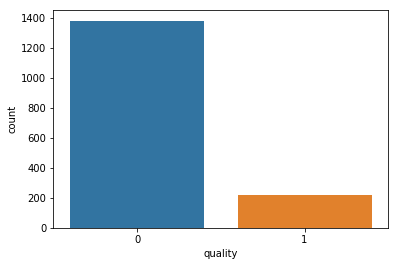

In [26]:
label_quality = LabelEncoder()
wine['quality'] = LabelEncoder().fit_transform(wine['quality'])
wine.head(10)
wine['quality'].value_counts()
sns.countplot(wine['quality'])

In [28]:
#now seperate the dataset as response and feature var
x = wine.drop('quality',axis = 1)
y = wine['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [31]:
#applying standard scaling to get optimized result
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
#用同一种scaling 的method
x_test = sc.transform(x_test)
x_train[:10] 

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

 #Random Forest(medium size data)


In [38]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [41]:
#Classification_report
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[263  10]
 [ 23  24]]


SVM(small data)

In [44]:
clf = svm.SVC()
clf.fit(x_train,y_train)
pred_clf = clf.predict(x_test)
#Classification_report
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


Neural Network(big data)

In [48]:
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11),max_iter = 500)
mlpc.fit(x_train,y_train)
pred_mlpc = mlpc.predict(x_test)
#Classification_report
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       273
           1       0.62      0.49      0.55        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.77      0.72      0.74       320
weighted avg       0.87      0.88      0.88       320

[[259  14]
 [ 24  23]]


c:\users\yuxia\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test,pred_rfc)
cm

0.896875

In [54]:
x_new = [[7.3,0.58,0.00,2.0,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
x_new = sc.transform(x_new)
y_new = rfc.predict(x_new)
y_new

array([0], dtype=int64)